National Material Capabilities dataset (v6.0, annual values from 1816-2016)<br>
6 most widely used indicators: <br>
  military expenditure, military personnel, energy consumption, iron and steel production, urban population, and total population<br>
ps: CINC index is based on these six variables. 


In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd


In [ ]:
data=pd.read_csv("NMC-60-abridged.csv")


In [ ]:
#check if na
data.isnull().sum()

Text(0, 0.5, 'Composite Index of National Capability (CINC) score')

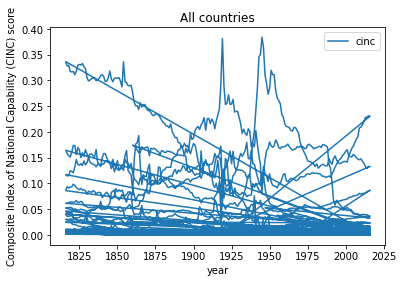

In [ ]:
data.plot('year', 'cinc');
plt.title("All countries")
plt.xlabel('year')
plt.ylabel('Composite Index of National Capability (CINC) score')

In [ ]:
!pip install pandas_alive

In [ ]:
import pandas_alive
def current_cinc(values):
    cinc=values['cinc']
    s=f'CINC : {cinc}'
    return {'x': .85, 'y': .2, 's': s, 'ha': 'right', 'size': 11}

def show(data,country):
  plt.style.use('ggplot')
  cdata=data[data['stateabb']==country]
  cdata['year']=pd.to_datetime(cdata['year'],format="%Y")
  cdata.set_index('year', inplace=True)
  cdata=cdata.drop('ccode', axis=1)
  cdata=cdata.drop('version',axis=1)
  cdata=cdata.drop('stateabb',axis=1)
  cdata['milex']=cdata['milex']/100
  cdata.fillna(0).tail(n=200).plot_animated(
    'country.gif',  
    period_fmt="%Y",  
    title=f'Six indicators of {country}',  
    #perpendicular_bar_func='mean',  #mean
    period_summary_func=current_cinc,  #Annual CINC
    cmap='Set1',  
    n_visible=6,  
    orientation='h',
  )

In [ ]:
show(data,"USA")

In [ ]:
#Look into 6 most powerful countries based on CINC of year 2016
df_2016=data[data['year']==2016] 
top_con=df_2016.nlargest(6, ['cinc'])
top_con

Text(0, 0.5, 'Composite Index of National Capability (CINC) score')

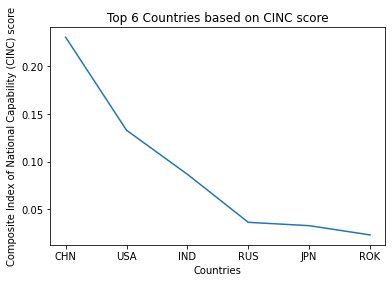

In [4]:
# Plot the decreasing trend of CINC for Top 6 coutries
plt.plot(top_con['stateabb'], top_con['cinc']);
plt.title("Top 6 Countries based on CINC score")
plt.xlabel('Countries')
plt.ylabel('Composite Index of National Capability (CINC) score')

In [ ]:
#Extract each country's dataframe
data_CHN=data[data['ccode']==710]
data_USA=data[data['ccode']==2]
data_IND=data[data['ccode']==750]
data_RUS=data[data['ccode']==365]
data_JPN=data[data['ccode']==740]
data_ROK=data[data['ccode']==732]
data_ROK

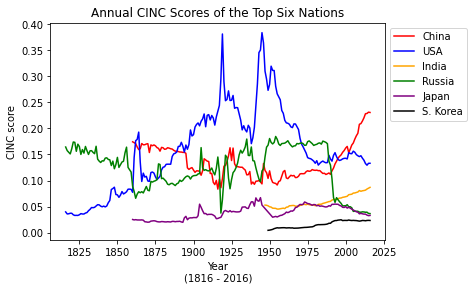

In [6]:
# Plot annually CINC score for the 6 coutries
plt.plot(data_CHN['year'],data_CHN['cinc'],color='red')
plt.plot(data_USA['year'],data_USA['cinc'],color='blue')
plt.plot(data_IND['year'],data_IND['cinc'],color='orange')
plt.plot(data_RUS['year'],data_RUS['cinc'],color='green')
plt.plot(data_JPN['year'],data_JPN['cinc'],color='purple')
plt.plot(data_ROK['year'],data_ROK['cinc'],color='black')
plt.title("Annual CINC Scores of the Top Six Nations")
plt.xlabel('Year\n(1816 - 2016)')
plt.ylabel('CINC score')
plt.legend(['China', 'USA', 'India', 'Russia', 'Japan', 'S. Korea'], bbox_to_anchor=(1, 1), ncol=1);

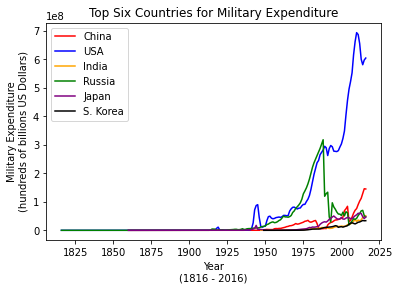

In [ ]:
#Military Expenditure
plt.plot(data_CHN['year'],data_CHN['milex'],color='red')
plt.plot(data_USA['year'],data_USA['milex'],color='blue')
plt.plot(data_IND['year'],data_IND['milex'],color='orange')
plt.plot(data_RUS['year'],data_RUS['milex'],color='green')
plt.plot(data_JPN['year'],data_JPN['milex'],color='purple')
plt.plot(data_ROK['year'],data_ROK['milex'],color='black')
plt.title("Top Six Countries for Military Expenditure")
plt.xlabel('Year\n(1816 - 2016)')
plt.ylabel('Military Expenditure\n(hundreds of billions US Dollars)')
plt.legend(['China', 'USA', 'India', 'Russia', 'Japan', 'S. Korea']);

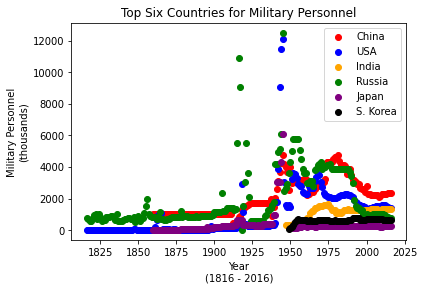

In [ ]:
#Military Personnel
plt.scatter(data_CHN['year'],data_CHN['milper'],color='red')
plt.scatter(data_USA['year'],data_USA['milper'],color='blue')
plt.scatter(data_IND['year'],data_IND['milper'],color='orange')
plt.scatter(data_RUS['year'],data_RUS['milper'],color='green')
plt.scatter(data_JPN['year'],data_JPN['milper'],color='purple')
plt.scatter(data_ROK['year'],data_ROK['milper'],color='black')
plt.title("Top Six Countries for Military Personnel")
plt.xlabel('Year\n(1816 - 2016)')
plt.ylabel('Military Personnel\n(thousands)')
plt.legend(['China', 'USA', 'India', 'Russia', 'Japan', 'S. Korea']);

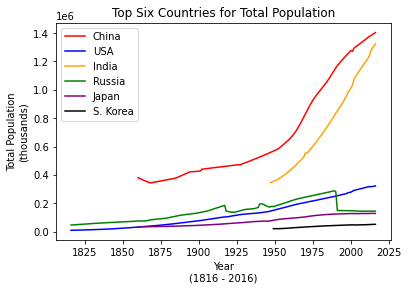

In [ ]:
#Total Population
plt.plot(data_CHN['year'],data_CHN['tpop'],color='red')
plt.plot(data_USA['year'],data_USA['tpop'],color='blue')
plt.plot(data_IND['year'],data_IND['tpop'],color='orange')
plt.plot(data_RUS['year'],data_RUS['tpop'],color='green')
plt.plot(data_JPN['year'],data_JPN['tpop'],color='purple')
plt.plot(data_ROK['year'],data_ROK['tpop'],color='black')
plt.title("Top Six Countries for Total Population")
plt.xlabel('Year\n(1816 - 2016)')
plt.ylabel('Total Population\n(thousands)')
plt.legend(['China', 'USA', 'India', 'Russia', 'Japan', 'S. Korea']);

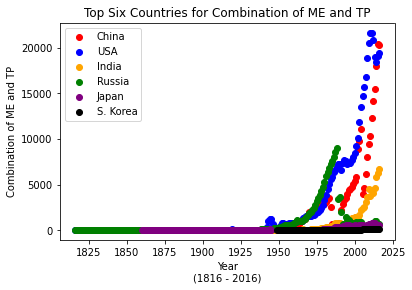

In [ ]:
#Combination of Military expenditure and total population
plt.scatter(data_CHN['year'],data_CHN['milex']*data_CHN['tpop']/1e10,color='red')
plt.scatter(data_USA['year'],data_USA['milex']*data_USA['tpop']/1e10,color='blue')
plt.scatter(data_IND['year'],data_IND['milex']*data_IND['tpop']/1e10,color='orange')
plt.scatter(data_RUS['year'],data_RUS['milex']*data_RUS['tpop']/1e10,color='green')
plt.scatter(data_JPN['year'],data_JPN['milex']*data_JPN['tpop']/1e10,color='purple')
plt.scatter(data_ROK['year'],data_ROK['milex']*data_ROK['tpop']/1e10,color='black')
plt.title("Top Six Countries for Combination of ME and TP")
plt.xlabel('Year\n(1816 - 2016)')
plt.ylabel('Combination of ME and TP')
plt.legend(['China', 'USA', 'India', 'Russia', 'Japan', 'S. Korea']);

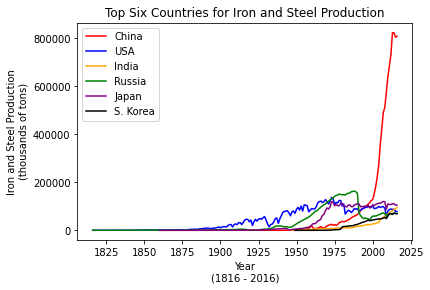

In [ ]:
#Iron and steel production
plt.plot(data_CHN['year'],data_CHN['irst'],color='red')
plt.plot(data_USA['year'],data_USA['irst'],color='blue')
plt.plot(data_IND['year'],data_IND['irst'],color='orange')
plt.plot(data_RUS['year'],data_RUS['irst'],color='green')
plt.plot(data_JPN['year'],data_JPN['irst'],color='purple')
plt.plot(data_ROK['year'],data_ROK['irst'],color='black')
plt.title("Top Six Countries for Iron and Steel Production")
plt.xlabel('Year\n(1816 - 2016)')
plt.ylabel('Iron and Steel Production\n(thousands of tons)')
plt.legend(['China', 'USA', 'India', 'Russia', 'Japan', 'S. Korea']);


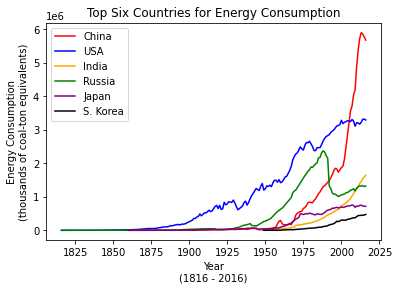

In [ ]:
#Energy Consumption
plt.plot(data_CHN['year'],data_CHN['pec'],color='red')
plt.plot(data_USA['year'],data_USA['pec'],color='blue')
plt.plot(data_IND['year'],data_IND['pec'],color='orange')
plt.plot(data_RUS['year'],data_RUS['pec'],color='green')
plt.plot(data_JPN['year'],data_JPN['pec'],color='purple')
plt.plot(data_ROK['year'],data_ROK['pec'],color='black')
plt.title("Top Six Countries for Energy Consumption")
plt.xlabel('Year\n(1816 - 2016)')
plt.ylabel('Energy Consumption\n(thousands of coal-ton equivalents)')
plt.legend(['China', 'USA', 'India', 'Russia', 'Japan', 'S. Korea']);


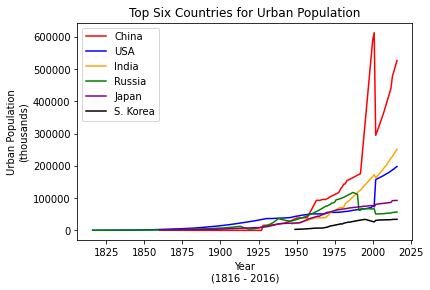

In [ ]:
#Urban Population
plt.plot(data_CHN['year'],data_CHN['upop'],color='red')
plt.plot(data_USA['year'],data_USA['upop'],color='blue')
plt.plot(data_IND['year'],data_IND['upop'],color='orange')
plt.plot(data_RUS['year'],data_RUS['upop'],color='green')
plt.plot(data_JPN['year'],data_JPN['upop'],color='purple')
plt.plot(data_ROK['year'],data_ROK['upop'],color='black')
plt.title("Top Six Countries for Urban Population")
plt.xlabel('Year\n(1816 - 2016)')
plt.ylabel('Urban Population\n(thousands)')
plt.legend(['China', 'USA', 'India', 'Russia', 'Japan', 'S. Korea']);